In [1]:
%matplotlib inline

In [2]:
from pages.A_Explore_Preprocess_Dataset import load_dataset
filepath = "Loan_default.csv"
df = load_dataset(filepath)
df.head()

2025-05-12 12:49:53.741 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:49:53.944 
  command:

    streamlit run /home/salahuddin/.local/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-12 12:49:53.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:49:53.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:49:53.948 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:49:53.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:49:53.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:49:53.950 Thread 'MainTh

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
import numpy as np
# print basic statistics about dataset - number of features, distribution of target variable
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"Number of categorical features: {len(categorical_cols)}")

num_rows_with_missing = df.isnull().any(axis=1).sum()
print(f"% of rows with missing values: {num_rows_with_missing/df.shape[0] * 100:.2f}%")

print("Counts of 0 and 1:", df['Default'].value_counts())

Number of rows: 255347
Number of features: 18
Number of numeric features: 10
Number of categorical features: 8
% of rows with missing values: 0.00%
Counts of 0 and 1: Default
0    225694
1     29653
Name: count, dtype: int64


In [4]:
print(len(categorical_cols))
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print()

8
LoanID: 255347 unique values
LoanID
I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: count, Length: 255347, dtype: int64

Education: 4 unique values
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType: 4 unique values
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus: 3 unique values
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage: 2 unique values
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents: 2 unique values
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose: 5 unique values
LoanPurpose
Business     51298
Home         51286
Education    51005
Other    

In [5]:
df = df.drop(columns="LoanID")

In [6]:
from pages.A_Explore_Preprocess_Dataset import one_hot_encode_feature 
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = one_hot_encode_feature(df, categorical_cols)

2025-05-12 12:50:06.948 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:50:06.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:50:06.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:50:06.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:50:06.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:50:06.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [7]:
print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes'],
      dtype='object')


In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (roc_auc_score, average_precision_score, 
                             confusion_matrix, ConfusionMatrixDisplay)

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

Using: cpu


In [9]:
# %% 
# -------- 1.1  Identify columns ----------
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
target   = 'Default'

X = df.drop(columns=[target]).copy()
y = df[target].copy()

# -------- 1.2  Train / test split (stratified) ----------
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=seed)
train_idx, test_idx = next(sss.split(X, y))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx].values, y.iloc[test_idx].values

# -------- 1.3  Standard-scale numeric features ----------
scaler = StandardScaler().fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test [num_cols] = scaler.transform(X_test [num_cols])

# Good practice – keep the scaler for future inference
Path("artifacts").mkdir(exist_ok=True)
pd.to_pickle(scaler, "artifacts/num_scaler.pkl")


/tmp/ipykernel_8094/1590693432.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.transform(X_train[num_cols])
/tmp/ipykernel_8094/1590693432.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test [num_cols] = scaler.transform(X_test [num_cols])


In [10]:
# %% 
# Convert pandas → torch tensors
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
X_test_t  = torch.tensor(X_test.values , dtype=torch.float32)
y_train_t = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)
y_test_t  = torch.tensor(y_test .reshape(-1,1), dtype=torch.float32)

# Full train dataset ➜ random split into train / val
full_ds = TensorDataset(X_train_t, y_train_t)
val_fraction = 0.15
n_val  = int(len(full_ds) * val_fraction)
n_train= len(full_ds) - n_val
train_ds, val_ds = random_split(full_ds, [n_train, n_val], 
                                generator=torch.Generator().manual_seed(seed))

train_dl = DataLoader(train_ds, batch_size=1024, shuffle=True,  drop_last=True)
val_dl   = DataLoader(val_ds  , batch_size=2048, shuffle=False, drop_last=False)
test_dl  = DataLoader(TensorDataset(X_test_t, y_test_t),
                      batch_size=2048, shuffle=False)


In [11]:
# %% 
pos_weight = torch.tensor([ len(y_train) / y_train.sum()  - 1])  # ≈7.6
print("pos_weight =", pos_weight.item())


pos_weight = 7.611289098726919


In [12]:
# %% 
class MLP(nn.Module):
    def __init__(self, n_in):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_in, 256), nn.ReLU(), nn.Dropout(0.20),
            nn.Linear(256,128),   nn.ReLU(), nn.Dropout(0.20),
            nn.Linear(128,64),    nn.ReLU(),
            nn.Linear(64,1)       # logits
        )
    def forward(self, x): 
        return self.net(x)

model = MLP(X_train_t.shape[1]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight.to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                                       mode='min', factor=0.5,
                                                       patience=2, verbose=True)


/home/salahuddin/.local/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [15]:
# %% 
epochs          = 40
best_auc        = 0
patience        = 4
epochs_no_improve= 0
ckpt_path       = "artifacts/mlp_best.pt"

for epoch in range(1, epochs+1):
    # ---- Train ----
    model.train()
    train_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_dl.dataset)
    
    # ---- Validate ----
    model.eval()
    y_val_pred = []
    y_val_true = []
    with torch.no_grad():
        for xb, yb in val_dl:
            xb = xb.to(device)
            logits = model(xb)
            y_val_pred.append(torch.sigmoid(logits).cpu())
            y_val_true.append(yb)
    y_val_pred = torch.cat(y_val_pred).numpy().ravel()
    y_val_true = torch.cat(y_val_true).numpy().ravel()
    val_auc  = roc_auc_score(y_val_true, y_val_pred)
    scheduler.step(-val_auc)  # scheduler expects "min"; invert sign
    
    print(f"Epoch {epoch:02d}: train_loss={train_loss:.4f}  val_AUC={val_auc:.4f}")
    
    # # ---- Early stopping ----
    # if val_auc > best_auc + 1e-4:
    #     best_auc = val_auc
    #     epochs_no_improve = 0
    #     torch.save(model.state_dict(), ckpt_path)
    # else:
    #     epochs_no_improve += 1
    #     if epochs_no_improve >= patience:
    #         print("🛑 Early stopping")
    #         break


Epoch 01: train_loss=1.0198  val_AUC=0.7514
Epoch 02: train_loss=1.0197  val_AUC=0.7514
Epoch 03: train_loss=1.0189  val_AUC=0.7514
Epoch 04: train_loss=1.0196  val_AUC=0.7514
Epoch 05: train_loss=1.0183  val_AUC=0.7513
Epoch 06: train_loss=1.0190  val_AUC=0.7514
Epoch 07: train_loss=1.0183  val_AUC=0.7513
Epoch 08: train_loss=1.0191  val_AUC=0.7513
Epoch 09: train_loss=1.0182  val_AUC=0.7513
Epoch 10: train_loss=1.0191  val_AUC=0.7513
Epoch 11: train_loss=1.0193  val_AUC=0.7513
Epoch 12: train_loss=1.0197  val_AUC=0.7513
Epoch 13: train_loss=1.0192  val_AUC=0.7513
Epoch 14: train_loss=1.0194  val_AUC=0.7513
Epoch 15: train_loss=1.0186  val_AUC=0.7513
Epoch 16: train_loss=1.0193  val_AUC=0.7513
Epoch 17: train_loss=1.0194  val_AUC=0.7513
Epoch 18: train_loss=1.0200  val_AUC=0.7513
Epoch 19: train_loss=1.0187  val_AUC=0.7513
Epoch 20: train_loss=1.0195  val_AUC=0.7513
Epoch 21: train_loss=1.0191  val_AUC=0.7513
Epoch 22: train_loss=1.0195  val_AUC=0.7513
Epoch 23: train_loss=1.0189  val

In [16]:
# %% 
# reload the best weights
# model.load_state_dict(torch.load(ckpt_path))
model.eval()

y_test_pred = []
with torch.no_grad():
    for xb, yb in test_dl:
        xb = xb.to(device)
        y_test_pred.append(torch.sigmoid(model(xb)).cpu())
y_test_pred = torch.cat(y_test_pred).numpy().ravel()

roc  = roc_auc_score(y_test, y_test_pred)
pr   = average_precision_score(y_test, y_test_pred)
print(f"Test ROC-AUC  : {roc:.4f}")
print(f"Test PR-AUC   : {pr :.4f}")


Test ROC-AUC  : 0.7593
Test PR-AUC   : 0.3330


In [17]:
# %%  ⬅️ add this cell after the ROC-AUC / PR-AUC block
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             precision_recall_curve, f1_score)

# ─────────────────────────────────────────────────────────
# 1. Plain accuracy at a chosen threshold (default 0.50)
thr = 0.50
y_pred_bin = (y_test_pred >= thr).astype(int)

acc  = accuracy_score(y_test, y_pred_bin)
bacc = balanced_accuracy_score(y_test, y_pred_bin)

print(f"Accuracy  (@ {thr:.2f}): {acc*100:6.2f} %")
print(f"Balanced Acc            : {bacc*100:6.2f} %")

# ─────────────────────────────────────────────────────────
# 2. Find threshold that maximises F1 on *validation* data
prec, rec, pr_thr = precision_recall_curve(y_val_true, y_val_pred)
f1   = 2*prec*rec / (prec+rec + 1e-12)
best = np.argmax(f1)
best_thr = pr_thr[best]

# Evaluate accuracy at that threshold on the test set
y_pred_best = (y_test_pred >= best_thr).astype(int)
acc_best  = accuracy_score(y_test, y_pred_best)
f1_best   = f1_score(y_test, y_pred_best)

print(f"\nBest-F1 threshold     : {best_thr:6.3f}")
print(f"Accuracy  (@ best F1) : {acc_best*100:6.2f} %")
print(f"F1-score (@ best F1)  : {f1_best*100:6.2f} %")


Accuracy  (@ 0.50):  69.91 %
Balanced Acc            :  69.10 %

Best-F1 threshold     :  0.619
Accuracy  (@ best F1) :  80.05 %
F1-score (@ best F1)  :  37.53 %


In [19]:
torch.save(model.state_dict(), ckpt_path)
model.eval()

with torch.no_grad():
    train_logits = model(
        torch.tensor(X_train.values, dtype=torch.float32, device=device)
    )
train_pred = torch.sigmoid(train_logits).cpu().numpy().ravel()
y_train_np = y_train  # pandas → numpy

# ------------------------------------------------------------
# 2. Threshold-free metrics
train_roc = roc_auc_score(y_train_np, train_pred)
train_pr  = average_precision_score(y_train_np, train_pred)
print(f"Train ROC-AUC : {train_roc:.4f}")
print(f"Train PR-AUC  : {train_pr :.4f}")

# ------------------------------------------------------------
# 3. Accuracy metrics at threshold 0.50
thr = 0.50
y_train_bin = (train_pred >= thr).astype(int)

acc  = accuracy_score(y_train_np, y_train_bin)
bacc = balanced_accuracy_score(y_train_np, y_train_bin)
print(f"\nAccuracy  (@ {thr:.2f}): {acc *100:6.2f} %")
print(f"Balanced Acc            : {bacc*100:6.2f} %")

# ------------------------------------------------------------
# 4. Accuracy & F1 at the threshold that maximises F1 on training data
prec, rec, pr_thr = precision_recall_curve(y_train_np, train_pred)
f1_scores = 2*prec*rec / (prec + rec + 1e-12)
best_idx  = f1_scores.argmax()
best_thr  = pr_thr[best_idx]

y_train_best = (train_pred >= best_thr).astype(int)
acc_best = accuracy_score(y_train_np, y_train_best)
f1_best  = f1_score(y_train_np, y_train_best)

print(f"\nBest-F1 threshold       : {best_thr:6.3f}")
print(f"Accuracy  (@ best F1)   : {acc_best*100:6.2f} %")
print(f"F1-score (@ best F1)    : {f1_best *100:6.2f} %")

Train ROC-AUC : 0.7638
Train PR-AUC  : 0.3327

Accuracy  (@ 0.50):  70.35 %
Balanced Acc            :  69.45 %

Best-F1 threshold       :  0.619
Accuracy  (@ best F1)   :  80.25 %
F1-score (@ best F1)    :  37.52 %


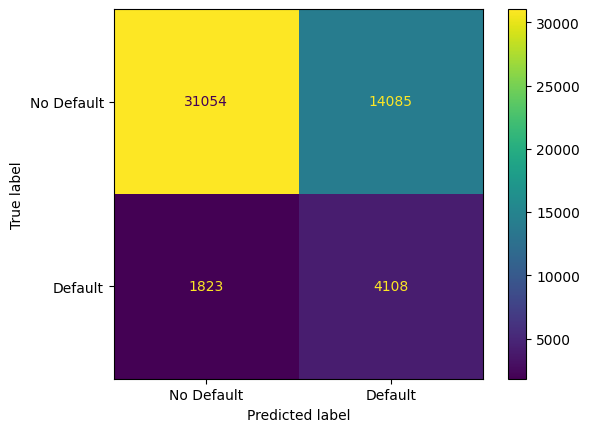

In [17]:
# %% 
thr = 0.5
y_hat = (y_test_pred >= thr).astype(int)
cm   = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(cm, display_labels=["No Default","Default"]).plot();
